In [ ]:
* ImageDataGenerator => Image Auganention?? [이미지 증강]
                        - flip, scale 등의 방법으로 이미지를 여러개로 늘리는 법
    
model -> compile -> fit -> predict

모델 만드는 법 3가지
- Sequential
- functional
- 

static mode 
graph mode
dynamic mode
eager mode


Transper learning

TL ResNet Residal 등.. 최근에 나온건 AfficientNet
        이미지 학습에 영향주는 요소 : 필터사이즈,레이어깊이,레졸루션
        
최근 추세는 강화학습에서 Transper learning으로 바뀌어가고 있다.
특정 목적에 의해 학습된 모델(프리 트레이닝된 모델)을 이용하여..

- fine-tuning : 프리 트레이닝된 모델 뒤의 ffnn망을 수정
    
- GAP(global averege pooling) : conv연산 후 flatten하게 되는데 어쨌다고?? 찾아보자 ㅠㅠ

In [ ]:
# CNN
K.set_iamge_data_format('channels_first')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten # Flatten : cnn결과를 1차원으로..
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10 # 클래스수가 많으니 멀티카테고리..
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

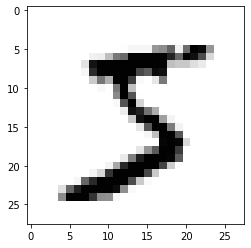

In [10]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap=plt.cm.Greys)

In [7]:
# channel_first
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

In [11]:
# channel_last
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape : ', x_train.shape, '\n')
print(x_train.shape[0], 'train samples\n')
print(x_test.shape[0], 'test samples\n')

#
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape :  (60000, 28, 28, 1) 

60000 train samples

10000 test samples



In [13]:
model = Sequential()

# 아웃풋 필터 32, 필터사이즈 3x3
# 28x28 => (128, 26, 26, 32)    #having : valid 모서리 특징 중요치 않으면, same(28,28): 모서리 특징도 중요하다면
model.add( Conv2D( 32, 3, 3, activation='relu', input_shape=( 28,28,1 ) ) ) # 채널 퍼스트 라스트에 따라 맞춰줘
# 128, 24, 24, 64
model.add( Conv2D( 64, 3, 3, activation='relu' ) )
# 128 12 12 64
model.add( MaxPooling2D( pool_size=(2, 2) ) )
model.add( Dropout( 0.25 ) )
model.add( Flatten() ) # 12 12 64 => 1차원으로 9216

# FFNN, FC(fully-connected)

model.add( Dense( 128, activation='relu' ) ) # 9216 x 128
# 128 x 128
model.add( Dropout( 0.5 ) ) # 계산회로만 생략
model.add( Dense( 10, activation='softmax' ) )# 128 x10
# 128 x 10






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [ ]:
model.compile( loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'] )

# 예전에는 train, test로 나눠서 했다. 그러나 test에 과적합되는 경우도..
# 그래서 train, test, validation 으로 나눠서 하게 되었.

class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩(재정의)
    def on_train_begin(self, logs={}): # 훈련시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append( logs.get('acc') )
        
history = AccuracyHistory()
model.fit( x_train, y_train,
          batch_size = batch_size, epochs = epochs, verbose = 1,
          validation_data = (x_test, y_test),
          callbacks = [history])
score = model.evaluate(x_test, y_test, verbose=0)

print(score[0], '\n')
print(score[1])



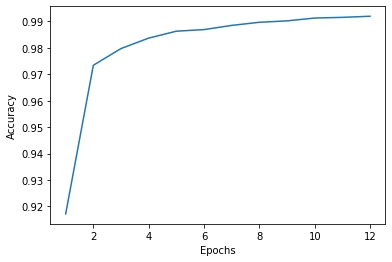

In [15]:
plt.plot( range(1, 13), history.acc )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 모델 저장 / 로딩

In [16]:
# HDFS(Hadoop file system) : model 구조 전체저장
# 가중치, 구조, optimiziation statge 등이 저장
# json으로 저장, 구조, 가중치를 별도로 저장 => 즉, web에서도 tensorflow를 지원한다.
# tensorflow.js 를 import할 수

model.save("model_mnist.h5")
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model("model_mnist.h5")
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)          

In [17]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x000002BC98630E18>
(None, 26, 26, 32)


In [ ]:
# ImageDataGenerator

Using TensorFlow backend.
C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


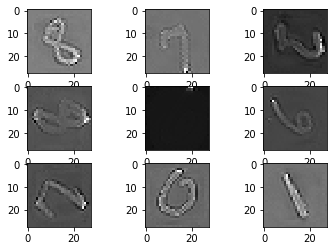

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
dataget = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
# 이미지 백색화 => noise제거(변수간 상관도를 없앰 : PCA같이)
datagen = ImageDataGenerator(zca_whitening=True,rotation_range=90)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                save_to_dir='images', save_prefix='aug', save_format='png'):
                # 저장할 폴더, 이미지 증강, 이미지 포맷
        
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

X_train shape :  (50000, 32, 32, 3) 

50000 train samples

10000 test samples



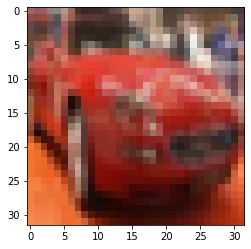

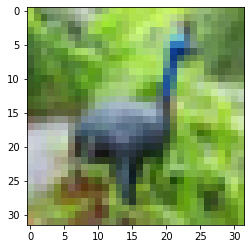

In [4]:
from keras.datasets import cifar10 # 10개의 이미지 종류로 구성
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck 분류문제

from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('X_train shape : ', X_train.shape, '\n')
print(X_train.shape[0], 'train samples\n')
print(X_test.shape[0], 'test samples\n')

NB_CLASSES = 10

Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [5]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [6]:
model = Sequential()
# residual 망의 구조를 따라해봄
# - conv2d relu 2번해주고 풀링해줌

# 32 x 32 x 3 => 32 x 32 x 32
model.add( Conv2D( 32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS ) ) )
model.add( Activation('relu') )
model.add( Conv2D( 32, kernel_size=3, padding='same') )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size=(2, 2) ) )
model.add( Dropout(0.25) )






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.add( Conv2D( 64, kernel_size=3, padding='same'))
model.add( Activation('relu') )
model.add( Conv2D( 64, 3, 3 ))
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size=(2, 2) ) )
model.add( Dropout(0.25) )

C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
model.add( Flatten() )
model.add( Dense(512) )
model.add( Activation('relu') )
model.add( Dropout(0.5) )
model.add( Dense(NB_CLASSES) )
model.add( Activation('softmax') )
model.summary()
model.compile( loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'] )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [43]:
# callback 으로 한 예
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 10s 255us/step - loss: 0.9727 - acc: 0.6918 - val_loss: 0.7848 - val_acc: 0.7531
Epoch 2/40
40000/40000 [==============================] - 10s 252us/step - loss: 0.9628 - acc: 0.6908 - val_loss: 0.7386 - val_acc: 0.7555
Epoch 3/40
40000/40000 [==============================] - 10s 252us/step - loss: 0.9714 - acc: 0.6933 - val_loss: 1.0655 - val_acc: 0.7432
Epoch 4/40
40000/40000 [==============================] - 10s 251us/step - loss: 0.9656 - acc: 0.6928 - val_loss: 0.9543 - val_acc: 0.7163
Epoch 5/40
40000/40000 [==============================] - 10s 251us/step - loss: 0.9545 - acc: 0.6966 - val_loss: 0.7152 - val_acc: 0.7674
Epoch 6/40
40000/40000 [==============================] - 10s 251us/step - loss: 0.9526 - acc: 0.6984 - val_loss: 0.7636 - val_acc: 0.7506
Epoch 7/40
40000/40000 [==============================] - 10s 249us/step - loss: 0.9453 - acc: 0.6967 - val_loss: 0.

In [46]:
# 지금까지는 똑같은 데이터였다 랜덤했지만 순서만 했지 모양을 랜덤으로 하진 않았다.
# 하지만 이미지 데이터 제너레이터를 이용하면 다양한 모양으로 생성을..
datagen = ImageDataGenerator( featurewise_center=False,
                              samplewise_center=False,
                              featurewise_std_normalization=False,
                              samplewise_std_normalization=False,
                              zca_whitening=False, # 이미지 PCA와 같다! 이미지 노이즈 제거
                              rotation_range=0,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=False)
datagen.fit(X_train)

In [47]:
model.fit_generator( datagen.flow( X_train, Y_train,
                                   batch_size=BATCH_SIZE),
                     samples_per_epoch = X_train.shape[0],
                     nb_epoch=NB_EPOCH,
                     verbose=VERBOSE )

Epoch 1/40
  3/390 [..............................] - ETA: 20s - loss: 1.3898 - acc: 0.5573

C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\ICT01_11\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  """


390/390 [==============================] - 18s 45ms/step - loss: 1.1825 - acc: 0.6224
Epoch 2/40
390/390 [==============================] - 18s 45ms/step - loss: 1.1781 - acc: 0.6229
Epoch 3/40
390/390 [==============================] - 18s 45ms/step - loss: 1.1632 - acc: 0.6269
Epoch 4/40
390/390 [==============================] - 18s 45ms/step - loss: 1.1547 - acc: 0.6288
Epoch 5/40
390/390 [==============================] - 17s 45ms/step - loss: 1.1518 - acc: 0.6261
Epoch 6/40
390/390 [==============================] - 17s 44ms/step - loss: 1.1547 - acc: 0.6305
Epoch 7/40
390/390 [==============================] - 17s 45ms/step - loss: 1.1557 - acc: 0.6271
Epoch 8/40
390/390 [==============================] - 17s 44ms/step - loss: 1.1462 - acc: 0.6320 0s - loss: 1.1483 - acc: 0
Epoch 9/40
390/390 [==============================] - 18s 45ms/step - loss: 1.1591 - acc: 0.6248
Epoch 10/40
390/390 [==============================] - 18s 46ms/step - loss: 1.1536 - acc: 0.6305
Epoch 11/40
3

In [48]:
# 평가
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score : ", score[0])
print("\nTest accuracy : ", score[1])

10000/10000 [==============================] - 1s 88us/step

Test score :  0.8897139163970947

Test accuracy :  0.7048


In [49]:
# 모델을 json으로 저장해보자
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [50]:
# json으로부터 model 만들기 & 가중치 부여
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json( loaded_model_json )
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

Loaded model from disk


- 문제1 : accuracy graph 출력해보세요
- 문제2 : 이미지 cat과 dog를 다운로드한 다음 위의 모델로 예측해보시오

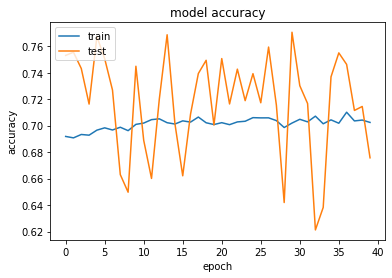

In [51]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left')

plt.show()

In [39]:
import numpy as np # 이미지 사이즈 일치
from imageio import imread
#import cv2
from skimage.transform import resize
from keras.models import model_from_json

img_names = ['cat.jpg', 'dog.jpg']
imgs = [ resize( imread( img_name ), (32, 32)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255

predictions = model.predict_classes(imgs)
print(predictions)

[0 0]


# 전이(transfer learning) 학습 Application
- 가중치 활용 : 그대로 적용, 일부만 활용, FFNN부분만 학습해서 사용 등..
- 반지도학습 : 일부데이터의 라벨이 없음. 예) KNN, Trenductive SVM

In [ ]:
# pre-trained : 이미 훈련된 넘을 쓰는 것
# fine-tuning : FFNN부분만 Domain knowledge에 맞춰 특화시키는..[가중치는 놔두고 데이터만 주고 학습]

PIL image size :  (224, 224) 



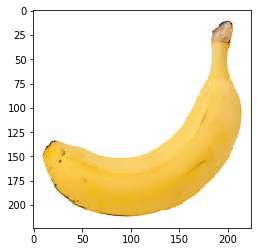

numpy array size :  (224, 224, 3) 

image batch size :  (1, 224, 224, 3) 



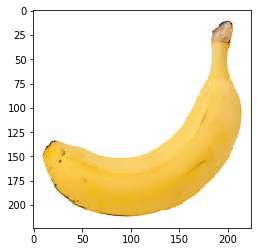

In [26]:
import PIL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50

filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size : ',original.size,'\n')
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow( np.uint8( numpy_image ) )
print('numpy array size : ', numpy_image.shape,'\n')

image_batch = np.expand_dims( numpy_image, axis=0 )
# 차원확대 하는 이유?? 이미지 여러장 처리한다는 전제조건..
# 하지만 1장밖에 없으니 3차원->4차원으로 확장
print('image batch size : ', image_batch.shape,'\n')

processed_image = resnet50.preprocess_input(image_batch.copy())
# 그동안은 dense를 이용하여 모델을 생성했다..
# 라벨 => 확률로 나옴
resnet_model = resnet50.ResNet50(weights = 'imagenet') # 가중치 초기화

# softmax 확률( 상위 3개로 예측 )
predictions = resnet_model.predict(processed_image)

In [27]:
label = decode_predictions(predictions, top=3) # 라벨링해주는 코드
print(label)

[[('n07753592', 'banana', 0.9999579), ('n03532672', 'hook', 2.4703648e-05), ('n07716906', 'spaghetti_squash', 5.4609304e-06)]]


In [ ]:
# VGG NET 동영상처리시 많이 쓰임

In [14]:
# tf.keras
# fine-tuning : ffnn 부분만 학습

# imagedatagenerator 와 비슷한 역할을 하는 from_tensor_slices 객체 # dataset을 생성

from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image

#tf.enable_eager_execution()

AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Users/ICT01_11/Downloads/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names ={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

In [15]:
all_images = list(data_dir.glob('*/*')) # 파일명 로딩
all_images = [str(path) for path in all_images]
random.shuffle(all_images)

# 라벨을 할당
# 디렉터리의 경로를 관리하는 라이브러리
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2) # 80% : 20%

x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]

img_size = 160
batch_size = 32

In [16]:
def _parse_data(x,y):
    image = tf.read_file(x) # 파일에는 헤더파일(압축방법 등이 기록되어있음)
    image = tf.image.decode_jpeg(image, channels= 3) # color
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1 # 이미지를 -1~1 사이의 값으로 만들기 위해 0~2로 만들어 -1해줌 
    # 이미지 사이즈를 통일 160 x 160
    image = tf.image.resize(image, (img_size, img_size))
    return image,y 

def _input_fn(x,y):
    # 기본단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # dataset을 생성
    ds = ds.map(_parse_data) # 데이터마다 함수를 적용할 때 사용
    # buffer 거쳐가는 기억공간
    ds = ds.shuffle(buffer_size=data_size) # 충분한 공간확보 
    ds = ds.repeat() # 데이터가 부족하면 처음부터 다시 시작
    ds = ds.batch(batch_size) # 미니배치사이즈
    ds = ds.prefetch(buffer_size=AUTOTUNE)  # 32 x 3 or 32x5 등.. 뭘 할지 오토로 알아서 하라고 지정
    return ds

train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [17]:
IMG_SHAPE = ( img_size, img_size, 3 )
VGG16_MODEL = tf.keras.applications.VGG16( input_shape=IMG_SHAPE, include_top=False, weights='imagenet' )
# 모델 생성하는 부분 없는 건 요거 때문
# include_top이 False인 경우는 input_shape=IMG_SHAPE를 지정
# convolution에 대한 가중치 학습이 없음

In [18]:
VGG16_MODEL.trainable = False
# flatten 이 없(가중치학습 시키지않음)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() #그래서 풀링 이거 씀.
# FFNN의 가중치는 학습시킴
prediction_layer = tf.keras.layers.Dense( len(label_names), activation='softmax' )

In [19]:
model = tf.keras.Sequential( [ # MODEL [ VGG16 가중치 + FFNN 가중치 학습] 
    VGG16_MODEL,
    global_average_layer,
    prediction_layer
] )

In [20]:
# sparse 희소행렬
model.compile( optimizer=tf.train.AdamOptimizer(),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [21]:
history = model.fit( train_ds, epochs=100, steps_per_epoch=2)
                     #validation_steps=2, validation_data=validation_ds)

Train on 2 steps
Epoch 1/100
2/2 [==============================] - 11s 6s/step - loss: 1.8703 - acc: 0.2188
Epoch 2/100
2/2 [==============================] - 0s 191ms/step - loss: 2.0279 - acc: 0.0625
Epoch 3/100
2/2 [==============================] - 0s 189ms/step - loss: 1.6634 - acc: 0.2344
Epoch 4/100
2/2 [==============================] - 0s 188ms/step - loss: 1.6068 - acc: 0.2188
Epoch 5/100
2/2 [==============================] - 0s 189ms/step - loss: 1.6342 - acc: 0.2500
Epoch 6/100
2/2 [==============================] - 0s 189ms/step - loss: 1.6325 - acc: 0.2031
Epoch 7/100
2/2 [==============================] - 0s 188ms/step - loss: 1.5520 - acc: 0.2031
Epoch 8/100
2/2 [==============================] - 0s 184ms/step - loss: 1.6357 - acc: 0.1406
Epoch 9/100
2/2 [==============================] - 0s 189ms/step - loss: 1.6018 - acc: 0.2188
Epoch 10/100
2/2 [==============================] - 0s 190ms/step - loss: 1.5165 - acc: 0.3594
Epoch 11/100
2/2 [==========================